In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

In [ ]:
df = pd.read_csv("/content/data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")

In [ ]:
df = pd.read_csv("df_clear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
model = Sequential()
model.add(GRU(100, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
    history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8842 - loss: 0.2589 - val_accuracy: 0.9668 - val_loss: 0.0937
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9614 - loss: 0.1117 - val_accuracy: 0.9729 - val_loss: 0.0827
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9691 - loss: 0.0878 - val_accuracy: 0.9750 - val_loss: 0.0787
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9743 - loss: 0.0751 - val_accuracy: 0.9785 - val_loss: 0.0669
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9760 - loss: 0.0692 - val_accuracy: 0.9761 - val_loss: 0.0709
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9763 - loss: 0.0660 - val_accuracy: 0.9794 - val_loss: 0.0625
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9772 - loss: 0.0642 - val_accuracy: 0.9662 - val_loss: 0.0700
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9785 - loss: 0.0599 - 

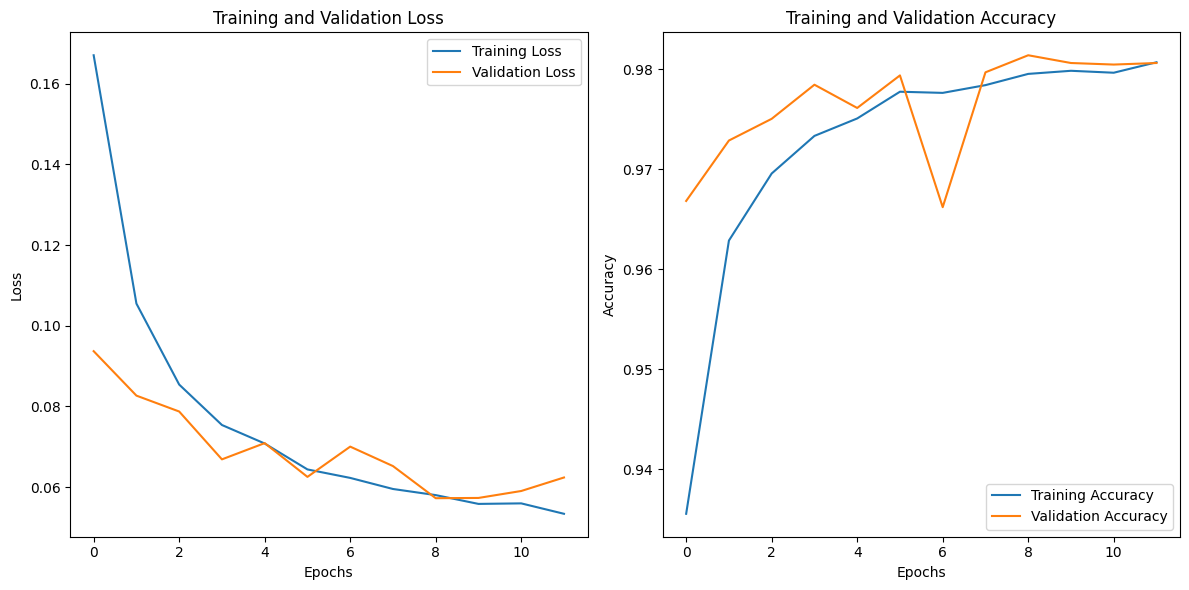

In [ ]:
# Extract loss and accuracy history
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

# Plotting the loss curves
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [ ]:
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2073   68]
 [  52 4259]]


<Figure size 640x480 with 0 Axes>

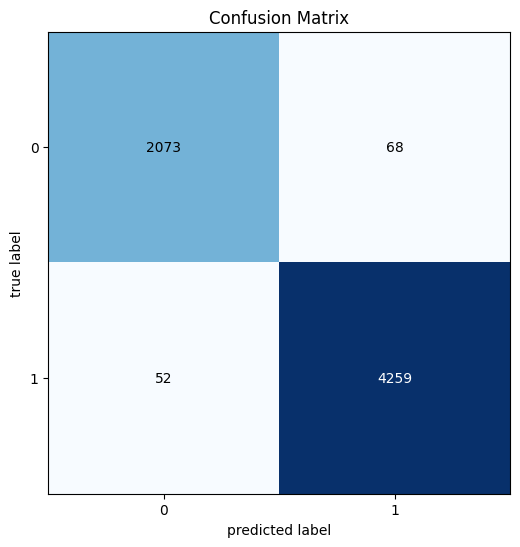

In [ ]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2141
           1       0.98      0.99      0.99      4311

    accuracy                           0.98      6452
   macro avg       0.98      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



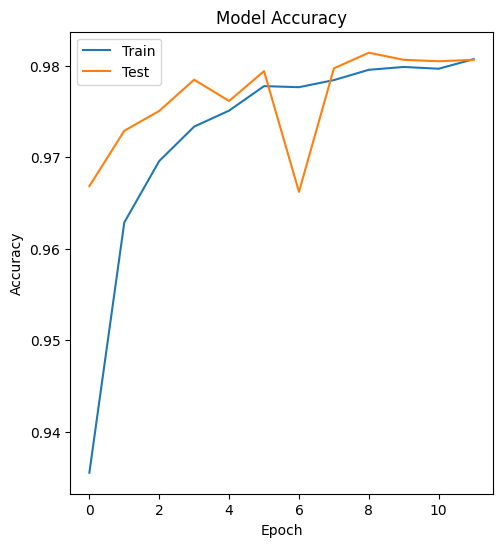

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

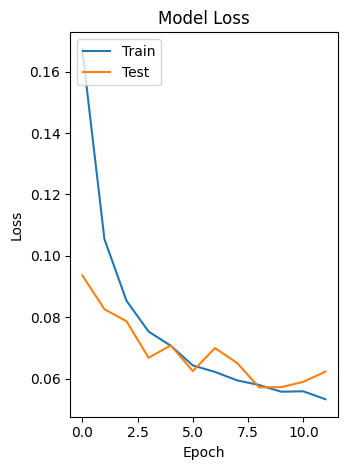

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

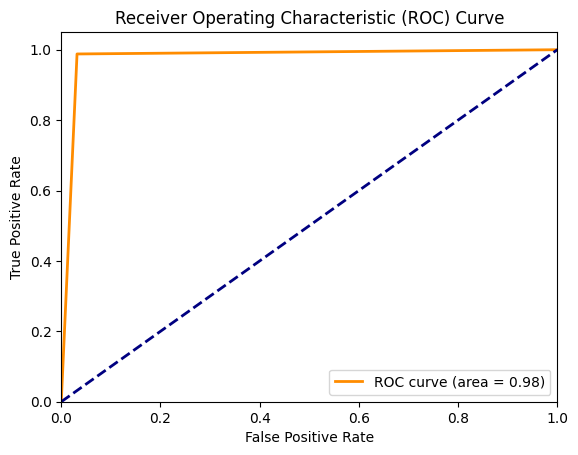

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

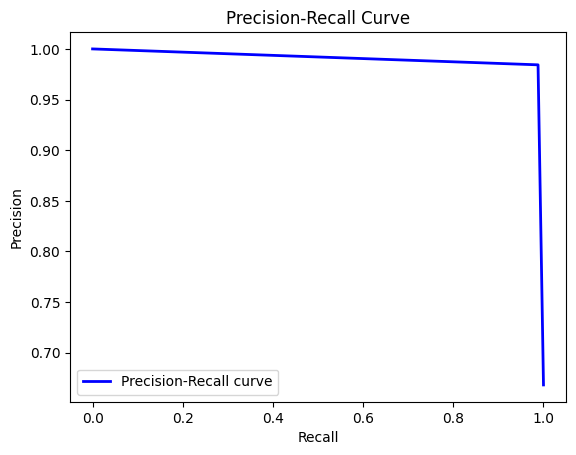

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)
test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 0
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8192
Enter the value for MajorLinkerVersion: 8
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 3
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 34112
Enter the value for ResourceSize: 1136
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.192000e+03]
  [8.000000e+00]
  [0.000000e+00]
  [3.000000e+00]
  [1.048576e+06]
  [3.411200e+04]
  [1.136000e+03]
  [0.000000e+00]]]
Predicted Probability: 0.6087669
Predicted Label: Benign
